In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the datasets (Using MNIST, CIFAR-10, and Fashion-MNIST as examples)
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()
#(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = keras.datasets.fashion_mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1 [each pixel value, originally in the range 0-255, is scaled to 0-1 by dividing by 255.]
x_train_mnist, x_test_mnist = x_train_mnist / 255.0, x_test_mnist / 255.0
#x_train_cifar, x_test_cifar = x_train_cifar / 255.0, x_test_cifar / 255.0
x_train_fashion, x_test_fashion = x_train_fashion / 255.0, x_test_fashion / 255.0

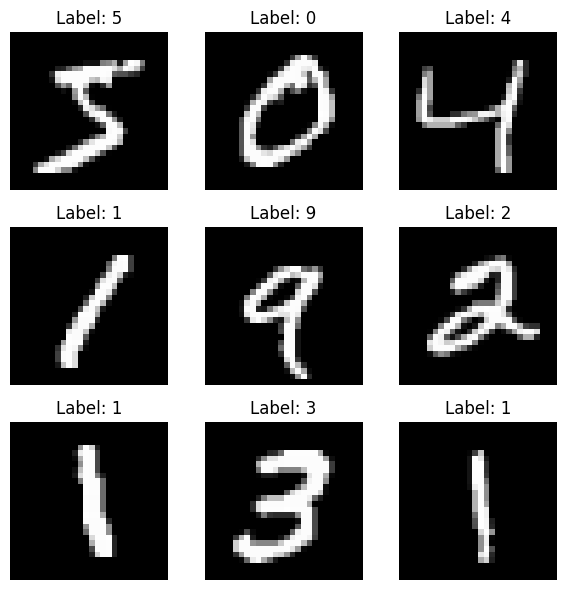

In [14]:
# Plot some images in MNIST
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_mnist[i], cmap='gray')  # Grayscale image
    plt.title(f"Label: {y_train_mnist[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

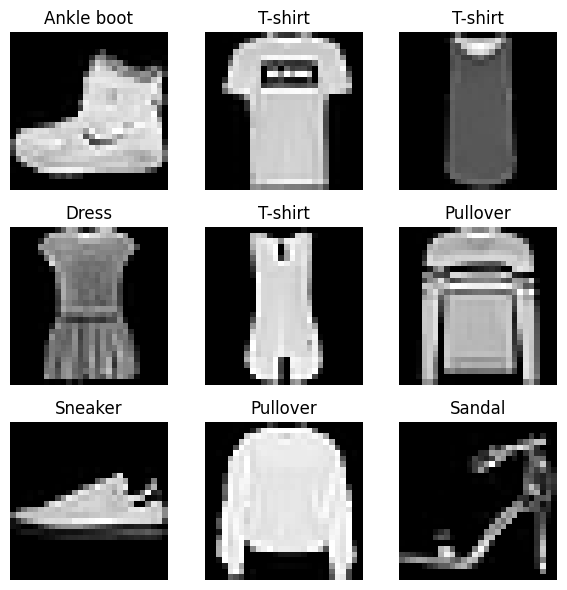

In [16]:
# Class names in Fashion-MNIST
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot some images
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_fashion[i], cmap='gray')  # Grayscale image
    plt.title(class_names[y_train_fashion[i]])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Expand dimensions to match CNN input format
# MNIST images are grayscale (single-channel). Therefore, CNNs require a 3D input per image (height × width × channels).
# tf.newaxis adds a missing dimension, making the shape (batch_size, 28, 28, 1). e.g., (60000, 28, 28) → (60000, 28, 28, 1) 
x_train_mnist = x_train_mnist[..., tf.newaxis] #x_train_mnist = np.expand_dims(x_train_mnist, axis=-1)
x_test_mnist = x_test_mnist[..., tf.newaxis]
x_train_fashion = x_train_fashion[..., tf.newaxis]
x_test_fashion = x_test_fashion[..., tf.newaxis]

In [5]:
# Define a basic CNN model
def create_cnn_model(input_shape):
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# List of Loss Functions, Optimizers, and Metrics
loss_functions = [
    ('sparse_categorical_crossentropy', 'For multi-class classification with integer labels'),
    ('categorical_crossentropy', 'For multi-class classification with one-hot encoded labels'),
    ('binary_crossentropy', 'For binary classification problems'),
    ('mean_squared_error', 'For regression tasks'),
    ('hinge', 'For Support Vector Machine (SVM) based classification')
]

optimizers = [
    ('adam', 'Adaptive Moment Estimation, adjusts learning rates dynamically'),
    ('sgd', 'Stochastic Gradient Descent, simple and effective for large datasets'),
    ('rmsprop', 'Good for RNNs and models with adaptive learning rates'),
    ('adagrad', 'Adapts learning rate for each parameter, works well for sparse data')
]

metrics = [
    ('accuracy', 'Measures how often predictions match labels'),
    ('precision', 'Measures correctness of positive predictions'),
    ('recall', 'Measures ability to capture all positive instances'),
    ('f1-score', 'Balances precision and recall for classification problems')
]

In [6]:
# Create and compile the model for MNIST dataset
mnist_model = create_cnn_model((28,28,1))
mnist_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

C:\Users\ayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Train the model and capture history on mnist
history = mnist_model.fit(x_train_mnist, y_train_mnist, epochs=5, validation_data=(x_test_mnist, y_test_mnist))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.8957 - loss: 0.3411 - val_accuracy: 0.9825 - val_loss: 0.0543
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.9846 - loss: 0.0477 - val_accuracy: 0.9897 - val_loss: 0.0313
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.9895 - loss: 0.0332 - val_accuracy: 0.9898 - val_loss: 0.0323
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 19ms/step - accuracy: 0.9925 - loss: 0.0231 - val_accuracy: 0.9901 - val_loss: 0.0309
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 26ms/step - accuracy: 0.9946 - loss: 0.0184 - val_accuracy: 0.9916 - val_loss: 0.0286


In [8]:
# Evaluate the model
test_loss, test_acc = mnist_model.evaluate(x_test_mnist, y_test_mnist, verbose=2)
print(f'\nTest accuracy for MNIST: {test_acc}')

313/313 - 3s - 8ms/step - accuracy: 0.9916 - loss: 0.0286

Test accuracy for MNIST: 0.991599977016449


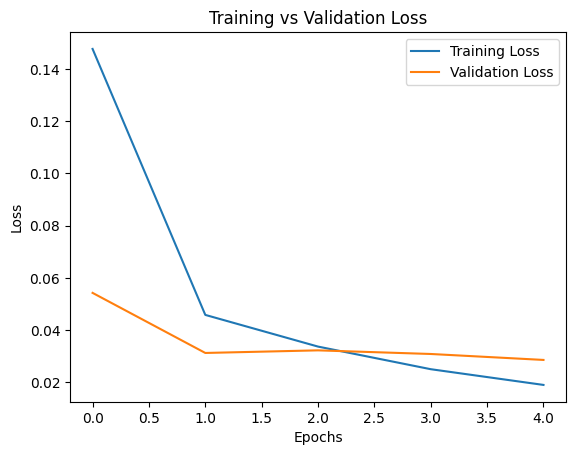

In [9]:
# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [10]:
# Train the model and capture history on fashion mnist
history = mnist_model.fit(x_train_fashion, y_train_fashion, epochs=5, validation_data=(x_test_fashion, y_test_fashion))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.7940 - loss: 0.5877 - val_accuracy: 0.8789 - val_loss: 0.3364
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 23ms/step - accuracy: 0.8925 - loss: 0.2933 - val_accuracy: 0.8870 - val_loss: 0.3089
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9095 - loss: 0.2485 - val_accuracy: 0.8942 - val_loss: 0.2922
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9177 - loss: 0.2213 - val_accuracy: 0.8994 - val_loss: 0.2795
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9238 - loss: 0.2024 - val_accuracy: 0.8989 - val_loss: 0.2888


In [12]:
# Evaluate the model
test_loss, test_acc = mnist_model.evaluate(x_test_fashion, y_test_fashion, verbose=2)
print(f'\nTest accuracy for Fashion MNIST: {test_acc}')

313/313 - 4s - 12ms/step - accuracy: 0.8989 - loss: 0.2888

Test accuracy for Fashion MNIST: 0.8988999724388123


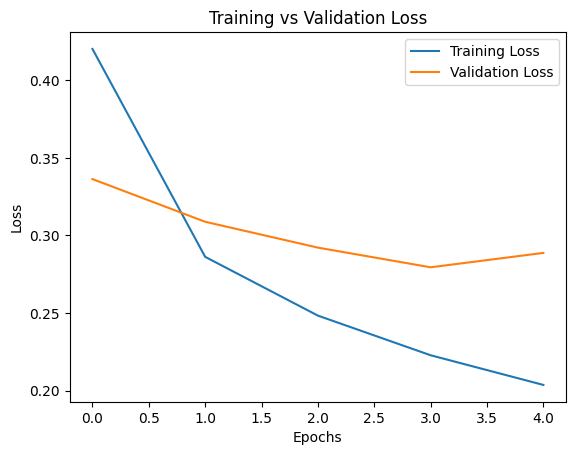

In [13]:
# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()